In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline
plt.rcParams['font.sans-serif']=['KaiTi'] #SIMHei 黑体 
plt.rcParams['axes.unicode_minus']=False #正常显示图中负号

In [2]:
data=pd.read_csv('data.csv')

In [58]:
data

,身高,体重,开设,课程,学号
0,195,109,有必要,概率统计,0
1,178,119,无必要,统计方法,1
2,156,122,有必要,编程技术,2
3,185,147,无必要,都学习过,3
4,179,130,有必要,都未学过,4
5,163,134,无必要,概率统计,5
6,168,149,有必要,统计方法,6
7,156,138,无必要,编程技术,7
8,173,129,有必要,都学习过,8
9,178,102,无必要,都未学过,9


In [3]:
data['开设'].value_counts() #value_counts()用来计算一维频数表

无必要    8
有必要    8
Name: 开设, dtype: int64

In [4]:
data['开设'].value_counts().sum() #数据的总个数

16

In [5]:
data.pivot_table(values='学号',index='开设',aggfunc=len)
#其中 aggfunc 表示用来指定聚合函数

,学号
开设,
无必要,8
有必要,8


# 由于 Python 中自带的 value_counts()函数只能统计定性数据的个数，无法计算其频率，因此， 这里我们可以自定义一个定性数据的汇总函数。

,案例数,构成比
无必要,8,50.0
有必要,8,50.0
合计,16,100.0


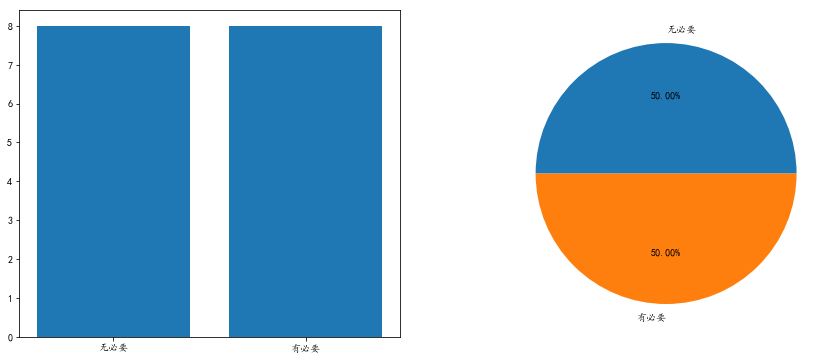

In [60]:
def tab(x,plot): #计数频数表
    f=x.value_counts()
    s=sum(f)
    p=round(f/s*100,3)
    T1=pd.concat([f,p],axis=1)
    T1.columns=['案例数','构成比']
    T2=pd.DataFrame({'案例数':s,'构成比':100.000},index=['合计'])
    Tab=T1.append(T2)
    if plot:
        fig,ax=plt.subplots(1,2,figsize=(15,6))
        ax[0].bar(f.index,f.values)
        ax[1].pie(p,labels=p.index,autopct='%1.2f%%') #绘制饼图
    return(round(Tab,3))
tab(data['开设'],True)

In [7]:
pd.cut(data['身高'],bins=10) #利用cut进行分组，其中bins表示组数

0       (191.1, 195.0]
1       (175.5, 179.4]
2     (155.961, 159.9]
3       (183.3, 187.2]
4       (175.5, 179.4]
5       (159.9, 163.8]
6       (167.7, 171.6]
7     (155.961, 159.9]
8       (171.6, 175.5]
9       (175.5, 179.4]
10      (171.6, 175.5]
11      (183.3, 187.2]
12      (179.4, 183.3]
13      (187.2, 191.1]
14      (163.8, 167.7]
15      (167.7, 171.6]
Name: 身高, dtype: category
Categories (10, interval[float64]): [(155.961, 159.9] < (159.9, 163.8] < (163.8, 167.7] < (167.7, 171.6] ... (179.4, 183.3] < (183.3, 187.2] < (187.2, 191.1] < (191.1, 195.0]]

In [8]:
pd.cut(data['身高'],bins=10).value_counts()
#先利用cut进行分组再统计，其中bins表示组数

(175.5, 179.4]      3
(183.3, 187.2]      2
(171.6, 175.5]      2
(167.7, 171.6]      2
(155.961, 159.9]    2
(191.1, 195.0]      1
(187.2, 191.1]      1
(179.4, 183.3]      1
(163.8, 167.7]      1
(159.9, 163.8]      1
Name: 身高, dtype: int64

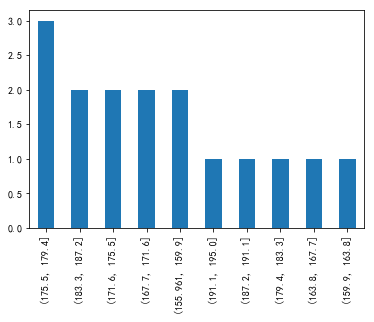

In [9]:
pd.cut(data['身高'],bins=10).value_counts().plot(kind='bar')

In [10]:
pd.cut(data['身高'],bins=[150,160,170,180,190,200]).value_counts()

(170, 180]    5
(180, 190]    4
(160, 170]    4
(150, 160]    2
(190, 200]    1
Name: 身高, dtype: int64

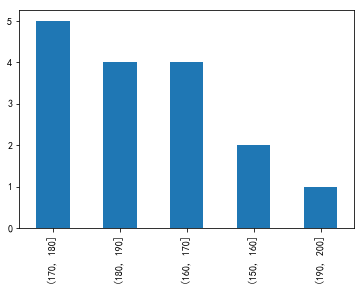

In [11]:
pd.cut(data['身高'],bins=[150,160,170,180,190,200]).value_counts().plot(kind='bar')

# 由于 Python 自带的 hist 函数不是以频数表的形式显示的，于是自定义一个函数 freq 来进行统计和绘图。

(array([2., 2., 0., 3., 1., 2., 1., 1., 0., 4.]),
 array([102. , 106.7, 111.4, 116.1, 120.8, 125.5, 130.2, 134.9, 139.6,
        144.3, 149. ]),
 <a list of 10 Patch objects>)

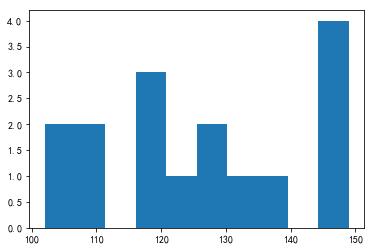

In [12]:
plt.hist(data['体重'],bins=10)

array([2., 2., 0., 3., 1., 2., 1., 1., 0., 4.])

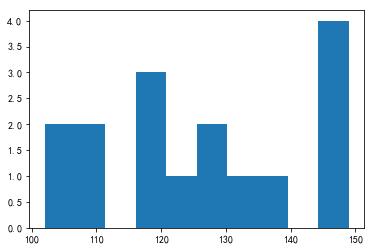

In [13]:
H=plt.hist(data['体重'],bins=10)
H[0]

In [14]:
print(H[1][:-1])
print(H[1][1:])

[102.  106.7 111.4 116.1 120.8 125.5 130.2 134.9 139.6 144.3]
[106.7 111.4 116.1 120.8 125.5 130.2 134.9 139.6 144.3 149. ]


,[下限,上限),频数,频率(%),累计频数(%)
0,102.0,106.7,2.0,12.50,12.50
1,106.7,111.4,2.0,12.50,25.00
2,111.4,116.1,0.0,0.00,25.00
3,116.1,120.8,3.0,18.75,43.75
4,120.8,125.5,1.0,6.25,50.00
5,125.5,130.2,2.0,12.50,62.50
6,130.2,134.9,1.0,6.25,68.75
7,134.9,139.6,1.0,6.25,75.00
8,139.6,144.3,0.0,0.00,75.00
9,144.3,149.0,4.0,25.00,100.00


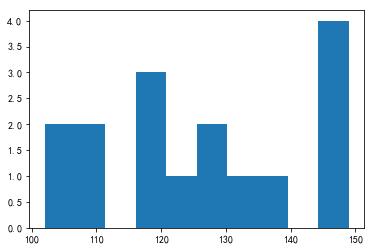

In [15]:
def frep(x,bins=10):
    H=plt.hist(x,bins)
    a=H[1][:-1]
    b=H[1][1:]
    f=H[0]
    p=f/sum(f)*100
    cp=np.cumsum(p)
    Freq=pd.DataFrame([a,b,f,p,cp])
    Freq.index=['[下限','上限)','频数','频率(%)','累计频数(%)']
    return round(Freq.T,2)
frep(data['体重']) #调用

In [40]:
data

,身高,体重,开设,课程,学号
0,195,109,有必要,概率统计,0
1,178,119,无必要,统计方法,1
2,156,122,有必要,编程技术,2
3,185,147,无必要,都学习过,3
4,179,130,有必要,都未学过,4
5,163,134,无必要,概率统计,5
6,168,149,有必要,统计方法,6
7,156,138,无必要,编程技术,7
8,173,129,有必要,都学习过,8
9,178,102,无必要,都未学过,9


In [42]:
pd.crosstab(data['开设'],data['课程'])
#做两个变量的交叉列联表

课程,概率统计,统计方法,编程技术,都学习过,都未学过
开设,,,,,
无必要,2,2,1,2,1
有必要,2,1,2,1,2


In [46]:
pd.crosstab(data['开设'],data['课程'],margins=True)
#行和列的合计可以使用参数margins=True

课程,概率统计,统计方法,编程技术,都学习过,都未学过,All
开设,,,,,,
无必要,2,2,1,2,1,8
有必要,2,1,2,1,2,8
All,4,3,3,3,3,16


# 对于二维表，我们经常要计算某个数据占行、列的比例或占总和的比例，也就是边缘概率。Python可以很简单地计算这些比例，使用`normalize` 参数，`normalize='index'`表示各数据占行的比例； `normalize='columns'`表示各数据占列的比例；`normalize='all'`,表示各数据占总和的构成比例。例 如

In [47]:
pd.crosstab(data['开设'],data['课程'],margins=True,normalize='index')

课程,概率统计,统计方法,编程技术,都学习过,都未学过
开设,,,,,
无必要,0.25,0.2500,0.1250,0.2500,0.1250
有必要,0.25,0.1250,0.2500,0.1250,0.2500
All,0.25,0.1875,0.1875,0.1875,0.1875


In [48]:
pd.crosstab(data['开设'],data['课程'],margins=True,normalize='columns')

课程,概率统计,统计方法,编程技术,都学习过,都未学过,All
开设,,,,,,
无必要,0.5,0.666667,0.333333,0.666667,0.333333,0.5
有必要,0.5,0.333333,0.666667,0.333333,0.666667,0.5


In [49]:
pd.crosstab(data['开设'],data['课程'],margins=True,normalize='all')

课程,概率统计,统计方法,编程技术,都学习过,都未学过,All
开设,,,,,,
无必要,0.125,0.1250,0.0625,0.1250,0.0625,0.5
有必要,0.125,0.0625,0.1250,0.0625,0.1250,0.5
All,0.250,0.1875,0.1875,0.1875,0.1875,1.0


In [52]:
pd.crosstab(data['开设'],data['课程'],margins=True,normalize='all').round(3)
#保留3位小数

课程,概率统计,统计方法,编程技术,都学习过,都未学过,All
开设,,,,,,
无必要,0.125,0.125,0.062,0.125,0.062,0.5
有必要,0.125,0.062,0.125,0.062,0.125,0.5
All,0.250,0.188,0.188,0.188,0.188,1.0


# 复式条形图

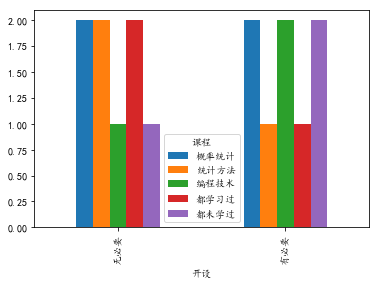

In [55]:
T2=pd.crosstab(data['开设'],data['课程'])
T2.plot(kind='bar')

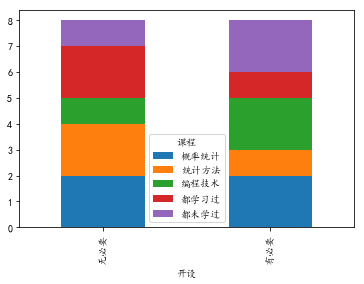

In [56]:
T2.plot(kind='bar',stacked=True)

In [62]:
type(data.groupby(['开设']))

pandas.core.groupby.generic.DataFrameGroupBy

In [64]:
data.groupby(['开设'])['身高'].mean()

开设
无必要    175.375
有必要    174.125
Name: 身高, dtype: float64

In [66]:
data.groupby(['开设'])['身高'].size()

开设
无必要    8
有必要    8
Name: 身高, dtype: int64

In [67]:
data.groupby(['开设','课程'])['身高'].mean()

开设   课程  
无必要  概率统计    166.0
     统计方法    181.5
     编程技术    156.0
     都学习过    187.0
     都未学过    178.0
有必要  概率统计    183.5
     统计方法    168.0
     编程技术    169.5
     都学习过    173.0
     都未学过    173.0
Name: 身高, dtype: float64

In [68]:
data.groupby(['开设','课程'])['身高'].size()

开设   课程  
无必要  概率统计    2
     统计方法    2
     编程技术    1
     都学习过    2
     都未学过    1
有必要  概率统计    2
     统计方法    1
     编程技术    2
     都学习过    1
     都未学过    2
Name: 身高, dtype: int64

# 对于分组的某一列或多列，应用 agg(func)可以对分组后的数据应用 func 函数，也可以推广到 同时作用于多个列和使用多个函数上。

In [69]:
data.groupby(['开设'])['身高'].agg([np.mean,np.std])

,mean,std
开设,,
无必要,175.375,11.673382
有必要,174.125,11.716137


In [70]:
data.groupby(['开设'])['身高','体重'].agg([np.mean,np.std])

身高                  体重           
        mean        std     mean        std
开设                                         
无必要  175.375  11.673382  129.375  18.950594
有必要  174.125  11.716137  123.250  13.024702

# apply()不同于 agg()的地方在于：前者应用于 dataframe 的各个列，后者仅作用于指定的列。

In [73]:
data.groupby(['开设'])['身高','体重'].apply(np.mean)

,身高,体重
开设,,
无必要,175.375,129.375
有必要,174.125,123.250


In [75]:
data.groupby(['开设','课程'])['身高','体重'].apply(np.mean)

身高     体重
开设  课程                
无必要 概率统计  166.0  118.5
    统计方法  181.5  133.0
    编程技术  156.0  138.0
    都学习过  187.0  146.0
    都未学过  178.0  102.0
有必要 概率统计  183.5  113.5
    统计方法  168.0  149.0
    编程技术  169.5  115.5
    都学习过  173.0  129.0
    都未学过  173.0  125.0

In [76]:
data.groupby(['开设','课程'])['身高','体重'].apply(np.sum)

身高   体重
开设  课程            
无必要 概率统计  332  237
    统计方法  363  266
    编程技术  156  138
    都学习过  374  292
    都未学过  178  102
有必要 概率统计  367  227
    统计方法  168  149
    编程技术  339  231
    都学习过  173  129
    都未学过  346  250

In [77]:
data.groupby(['开设','课程'])['身高','体重'].apply(np.var)
#计算方差

身高      体重
开设  课程                  
无必要 概率统计    9.00  240.25
    统计方法   12.25  196.00
    编程技术    0.00    0.00
    都学习过    4.00    1.00
    都未学过    0.00    0.00
有必要 概率统计  132.25   20.25
    统计方法    0.00    0.00
    编程技术  182.25   42.25
    都学习过    0.00    0.00
    都未学过   36.00   25.00

In [79]:
data.pivot_table(index=['开设'],values=['学号'],aggfunc=len)

,学号
开设,
无必要,8
有必要,8


In [81]:
data.pivot_table(values=['学号'],index=['课程','开设'],aggfunc=len)

学号
课程   开设     
概率统计 无必要   2
     有必要   2
统计方法 无必要   2
     有必要   1
编程技术 无必要   1
     有必要   2
都学习过 无必要   2
     有必要   1
都未学过 无必要   1
     有必要   2

In [84]:
data.pivot_table(values=['学号'],index=['开设'],columns=['课程'],aggfunc=len)

学号                    
课程  概率统计 统计方法 编程技术 都学习过 都未学过
开设                          
无必要    2    2    1    2    1
有必要    2    1    2    1    2

In [85]:
data.pivot_table(values=['学号'],index=['开设'],columns=['课程'],aggfunc=len,margins=True)

学号                        
课程  概率统计 统计方法 编程技术 都学习过 都未学过 All
开设                              
无必要    2    2    1    2    1   8
有必要    2    1    2    1    2   8
All    4    3    3    3    3  16

In [86]:
data.pivot_table(index=['开设'],values=['身高'],aggfunc=[np.mean,np.std])

,mean,std
,身高,身高
开设,,
无必要,175.375,11.673382
有必要,174.125,11.716137


In [88]:
data.pivot_table(['身高','体重'],['课程','开设'],aggfunc=[len,np.mean,np.std])

len      mean               std           
          体重 身高     体重     身高         体重         身高
课程   开设                                            
概率统计 无必要   2  2  118.5  166.0  21.920310   4.242641
     有必要   2  2  113.5  183.5   6.363961  16.263456
统计方法 无必要   2  2  133.0  181.5  19.798990   4.949747
     有必要   1  1  149.0  168.0        NaN        NaN
编程技术 无必要   1  1  138.0  156.0        NaN        NaN
     有必要   2  2  115.5  169.5   9.192388  19.091883
都学习过 无必要   2  2  146.0  187.0   1.414214   2.828427
     有必要   1  1  129.0  173.0        NaN        NaN
都未学过 无必要   1  1  102.0  178.0        NaN        NaN
     有必要   2  2  125.0  173.0   7.071068   8.485281